In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sn

In [2]:
file=pd.read_csv("winequality-red.csv",sep=";")

In [3]:
file.shape

(1599, 12)

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


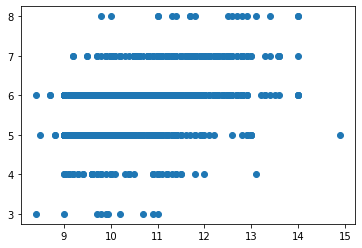

In [5]:
plt.scatter(file['alcohol'],file['quality'])


In [6]:
file.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
file['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
print("Total values of fixed acidity is: " + str(len(list(file["fixed acidity"].value_counts()))))
print("Total values of volatile acidity is: " + str(len(list(file["volatile acidity"].value_counts()))))
print("Total values of citric acid is: " + str(len(list(file["citric acid"].value_counts()))))
print("Total values of residual sugar is: " + str(len(list(file["residual sugar"].value_counts()))))
print("Total values of chlorides is: " + str(len(list(file["chlorides"].value_counts()))))
print("Total values of total sulfur dioxide is: " + str(len(list(file["total sulfur dioxide"].value_counts()))))
print("Total values of density is: " + str(len(list(file["density"].value_counts()))))
print("Total values of pH is: " + str(len(list(file["pH"].value_counts()))))
print("Total values of alcohol is: " + str(len(list(file["alcohol"].value_counts()))))

Total values of fixed acidity is: 96
Total values of volatile acidity is: 143
Total values of citric acid is: 80
Total values of residual sugar is: 91
Total values of chlorides is: 153
Total values of total sulfur dioxide is: 144
Total values of density is: 436
Total values of pH is: 89
Total values of alcohol is: 65


In [9]:
file.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

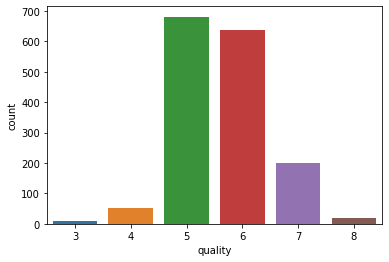

In [10]:
sn.countplot(x="quality",data=file)
plt.show()

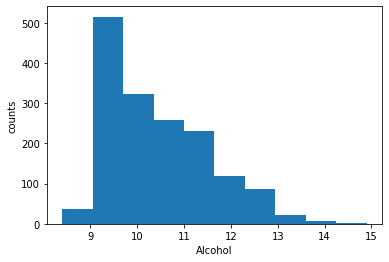

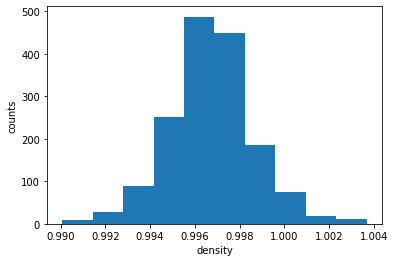

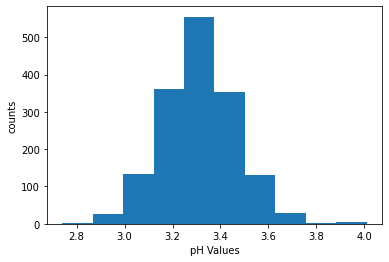

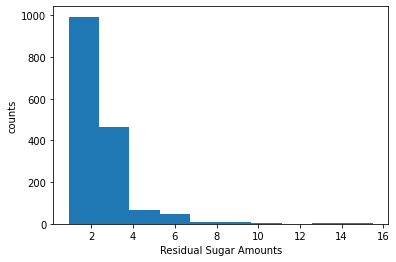

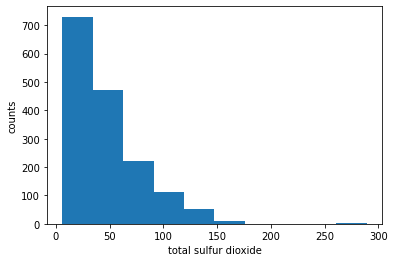

In [11]:
file["alcohol"].plot.hist()
plt.xlabel("Alcohol")
plt.ylabel("counts")
plt.show()
print()
file["density"].plot.hist()
plt.xlabel("density")
plt.ylabel("counts")
plt.show()
print()
file["pH"].plot.hist()
plt.xlabel("pH Values")
plt.ylabel("counts")
plt.show()
print()
file["residual sugar"].plot.hist()
plt.xlabel("Residual Sugar Amounts")
plt.ylabel("counts")
plt.show()
file["total sulfur dioxide"].plot.hist()
plt.xlabel("total sulfur dioxide")
plt.ylabel("counts")
plt.show()
 

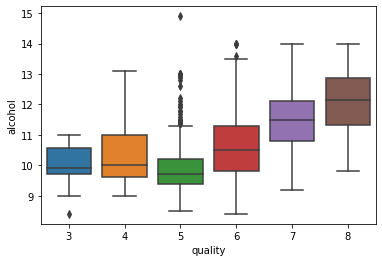

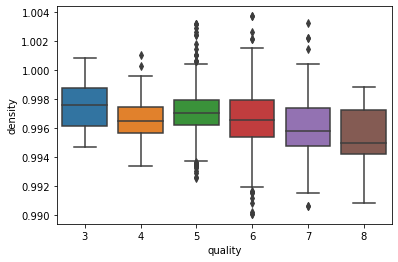

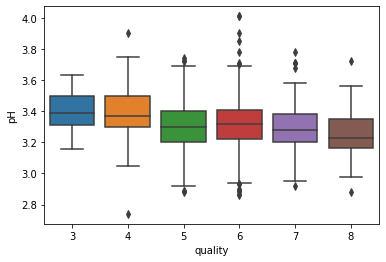

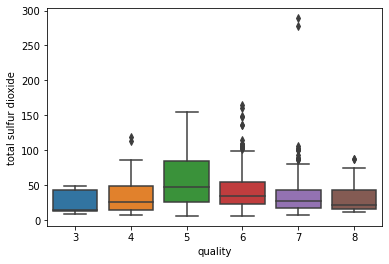

In [12]:
sn.boxplot(x="quality",y="alcohol",data=file)
plt.show()
print()
sn.boxplot(x="quality",y="density",data=file)
plt.show()
print()
sn.boxplot(x="quality",y="pH",data=file)
plt.show()
print()
sn.boxplot(x="quality",y="total sulfur dioxide",data=file)
plt.show()


# Cleaning Data
Lets drop some unwanted columns

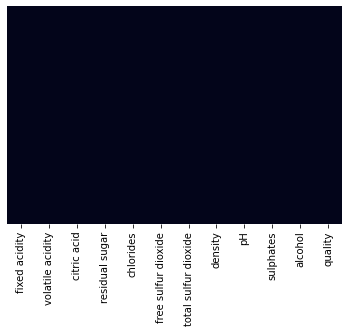

In [13]:
sn.heatmap(file.isnull(),yticklabels=False,cbar=False)
print()

In [14]:
file.drop(["free sulfur dioxide",'total sulfur dioxide'],axis=1,inplace=True)

In [15]:
file.shape
file.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,5


# Training and Testing the Model

In [53]:
X=file.iloc[:,[0,1,2,3,4,5,6,7,8]].values
#X=file.iloc[:,8].values.reshape(-1,1)
y=file.iloc[:,9].values

In [54]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [55]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_predict=lin_reg.predict(x_test)

In [56]:
metrics.mean_absolute_error(y_predict,y_test)

0.48627574576476035

In [57]:
a=metrics.mean_squared_error(y_predict,y_test)
a

0.3881494881998141

In [58]:
np.sqrt(a)

0.6230164429610298

# Finding theta and intercept

In [59]:
data=pd.DataFrame(lin_reg.coef_,columns=['Coefficient'])
data

,Coefficient
0,0.076783
1,-1.231868
2,-0.452994
3,0.015825
4,-1.486508
5,-45.081691
6,-0.202547
7,0.904914
8,0.276717


In [60]:
lin_reg.intercept_

47.99866850587115

In [61]:
# plt.scatter(y,X,color="green")
# plt.plot(x_test,y_predict,color="red",linewidth=5)
# plt.xlabel("Alcohol ")
# plt.ylabel("Quality")
# plt.show()

In [64]:
df=pd.DataFrame(y_predict)
df

,0
0,5.543125
1,5.434320
2,6.083311
3,5.693263
4,6.692706
...,...
315,5.682446
316,5.187914
317,5.047423
318,6.089510


In [65]:
df1=pd.DataFrame(y_test)
df1

,0
0,5
1,6
2,6
3,6
4,6
...,...
315,5
316,5
317,5
318,7
